<a href="https://colab.research.google.com/github/Manege24/AI-Coursework-2025/blob/main/MobilePriceRange_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Data Loading and Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MobilePriceRange.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())

Dataset Shape: (2000, 21)

First few rows:
   BatteryPower  InternalMemory  ClockSpeed  NoOfCores   RAM  TalkTime  \
0           842               7         2.2          2  2549        19   
1          1021              53         0.5          3  2631         7   
2           563              41         0.5          5  2603         9   
3           615              10         2.5          6  2769        11   
4          1821              44         1.2          2  1411        15   

   DualSim  3G  4G  WiFi  ...  MobileDepth  MobileWeight  TouchScreen  \
0        0   0   0     1  ...          0.6           188            0   
1        1   1   1     0  ...          0.7           136            1   
2        1   1   1     0  ...          0.9           145            1   
3        0   1   0     0  ...          0.8           131            0   
4        0   1   1     0  ...          0.6           141            1   

   ScreenHeight  ScreenWidth  FrontCameraPx  RearCameraPX  PxHeight  PxWe

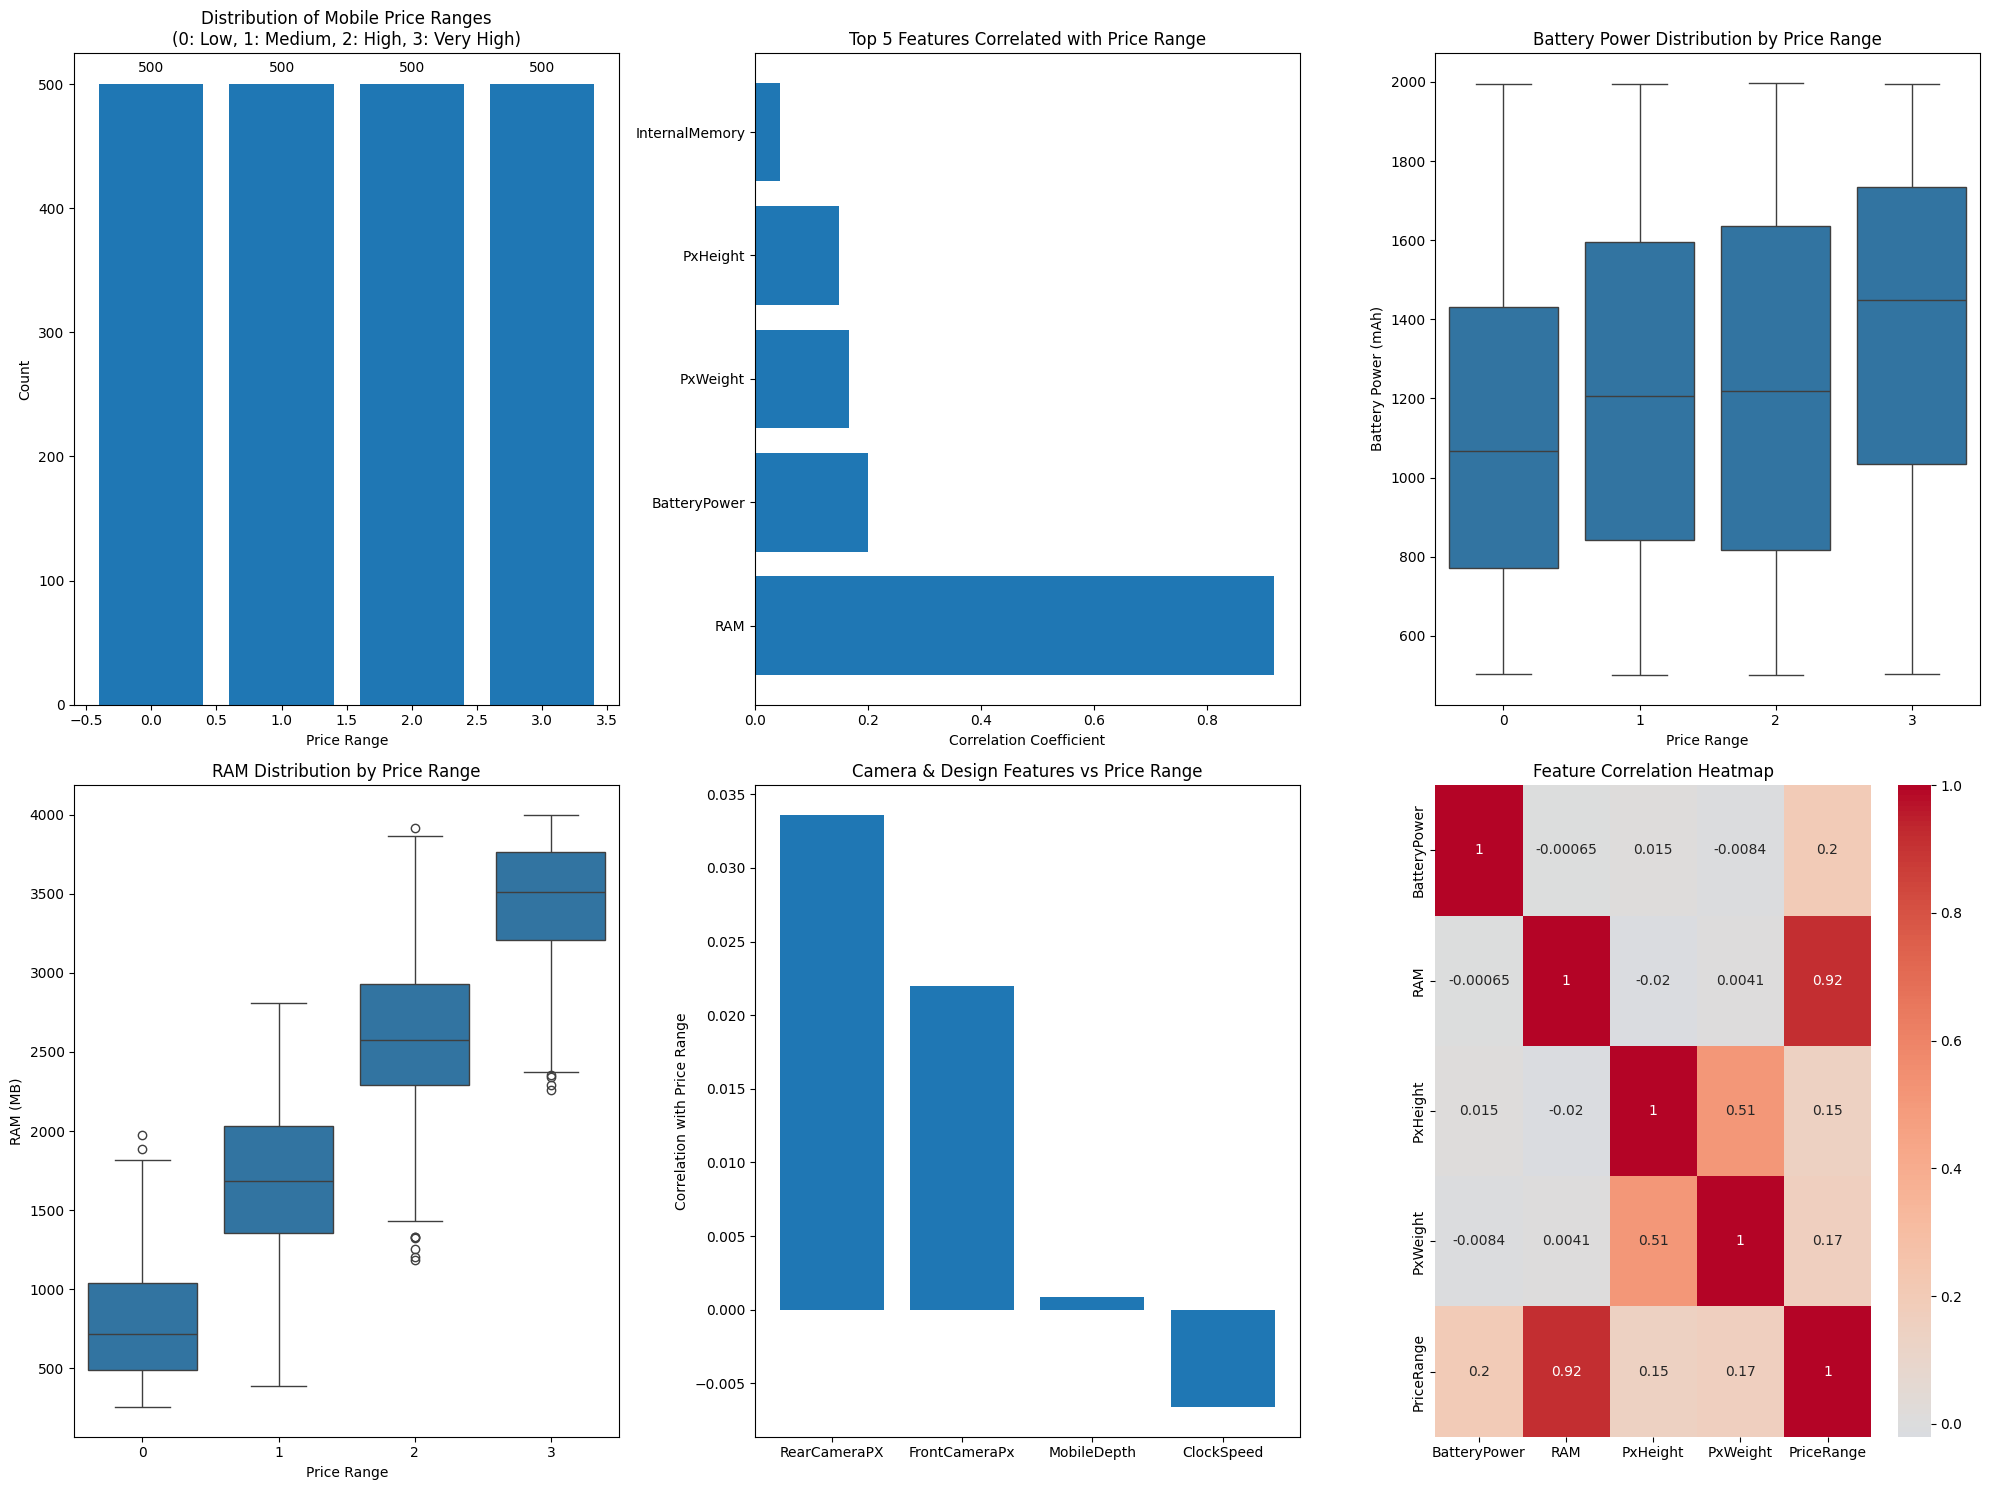


=== EDA INSIGHTS ===
1. The dataset has balanced classes across all four price ranges (500 each)
2. RAM shows the strongest positive correlation (0.92) with price range
3. Battery power generally increases with higher price ranges
4. Higher price ranges tend to have better camera quality and larger screen resolution


In [5]:
#2. Exploratory Data Analysis (6 insights)
# Set up the visualization style
plt.style.use('default')
plt.figure(figsize=(20, 15))

# Map 'PriceRange' to numerical values
price_range_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'VeryHigh': 3}
df['PriceRange'] = df['PriceRange'].map(price_range_mapping)

# Insight 1: Distribution of price ranges (target variable)
plt.subplot(2, 3, 1)
price_counts = df['PriceRange'].value_counts().sort_index()
plt.bar(price_counts.index, price_counts.values)
plt.title('Distribution of Mobile Price Ranges\n(0: Low, 1: Medium, 2: High, 3: Very High)')
plt.xlabel('Price Range')
plt.ylabel('Count')
for i, v in enumerate(price_counts.values):
    plt.text(i, v + 10, str(v), ha='center')

# Insight 2: Correlation between key features and price range
plt.subplot(2, 3, 2)
correlation_with_target = df.corr()['PriceRange'].sort_values(ascending=False)[1:6]
plt.barh(correlation_with_target.index, correlation_with_target.values)
plt.title('Top 5 Features Correlated with Price Range')
plt.xlabel('Correlation Coefficient')

# Insight 3: Battery power vs Price range
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='PriceRange', y='BatteryPower')
plt.title('Battery Power Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')

# Insight 4: RAM vs Price range
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='PriceRange', y='RAM')
plt.title('RAM Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')

# Insight 5: Camera quality comparison
plt.subplot(2, 3, 5)
camera_features = ['RearCameraPX', 'FrontCameraPx', 'MobileDepth', 'ClockSpeed'] # Corrected column names
camera_corr = df[camera_features + ['PriceRange']].corr()['PriceRange'].drop('PriceRange')
plt.bar(camera_corr.index, camera_corr.values)
plt.title('Camera & Design Features vs Price Range')
plt.ylabel('Correlation with Price Range')

# Insight 6: Heatmap of feature correlations
plt.subplot(2, 3, 6)
selected_features = ['BatteryPower', 'RAM', 'PxHeight', 'PxWeight', 'PriceRange']
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

print("\n=== EDA INSIGHTS ===")
print("1. The dataset has balanced classes across all four price ranges (500 each)")
print("2. RAM shows the strongest positive correlation (0.92) with price range")
print("3. Battery power generally increases with higher price ranges")
print("4. Higher price ranges tend to have better camera quality and larger screen resolution")

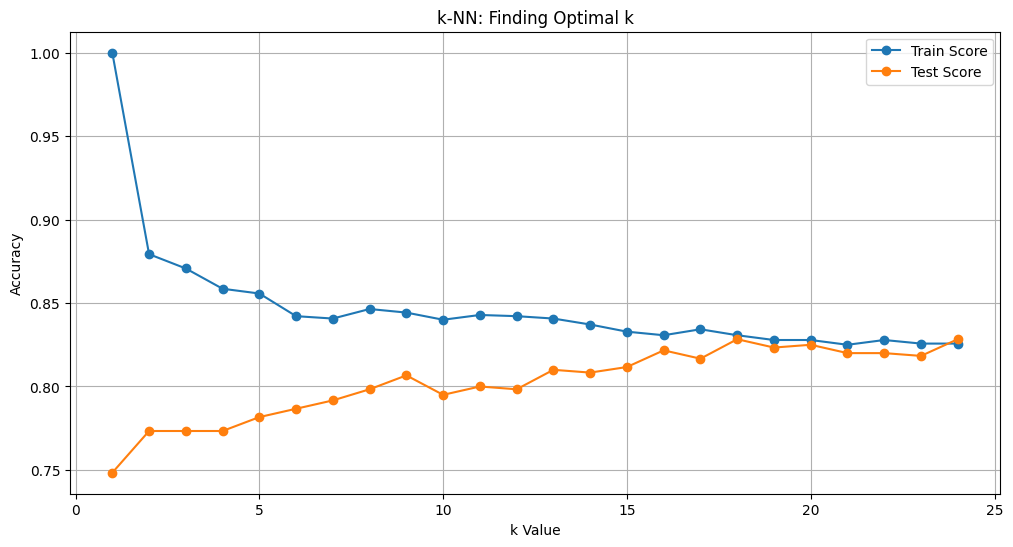

Optimal k: 18 with test accuracy: 0.828
Final k-NN Model Accuracy: 0.828


In [6]:
#3. k-Nearest neighbors model
# Select features and target
# Based on EDA, RAM and battery_power are strong predictors
X = df[['RAM', 'BatteryPower']]
y = df['PriceRange']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find optimal k for k-NN
k_range = range(1, 25)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot k vs accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, label='Train Score', marker='o')
plt.plot(k_range, test_scores, label='Test Score', marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('k-NN: Finding Optimal k')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal k
optimal_k = k_range[np.argmax(test_scores)]
optimal_accuracy = max(test_scores)
print(f"Optimal k: {optimal_k} with test accuracy: {optimal_accuracy:.3f}")

# Train final k-NN model with optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Final k-NN Model Accuracy: {knn_accuracy:.3f}")

Decision Tree Base Model Accuracy: 0.7366666666666667


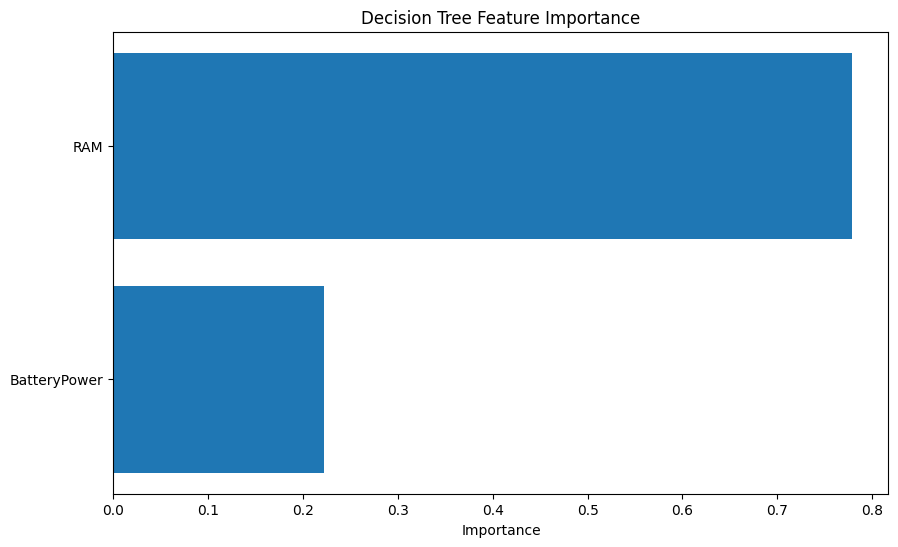

In [7]:
#4. Create Decision Tree classifier (eager learner)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  # No scaling needed for Decision Trees
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Base Model Accuracy:", dt_accuracy)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance')
plt.show()

In [9]:
#5. Hyperparameter tuning for decision tree
# Define hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=1)

grid_search.fit(X_train, y_train)

# Get best model
dt_tuned = grid_search.best_estimator_
y_pred_dt_tuned = dt_tuned.predict(X_test)
dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)

print("Best parameters:", grid_search.best_params_)
print(f"Tuned Decision Tree Accuracy: {dt_tuned_accuracy:.3f}")
print(f"Improvement: {dt_tuned_accuracy - dt_accuracy:.3f}")

# Compare with Random Forest as an alternative tuned model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

Performing hyperparameter tuning...
Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 15}
Tuned Decision Tree Accuracy: 0.790
Improvement: 0.053
Random Forest Accuracy: 0.788


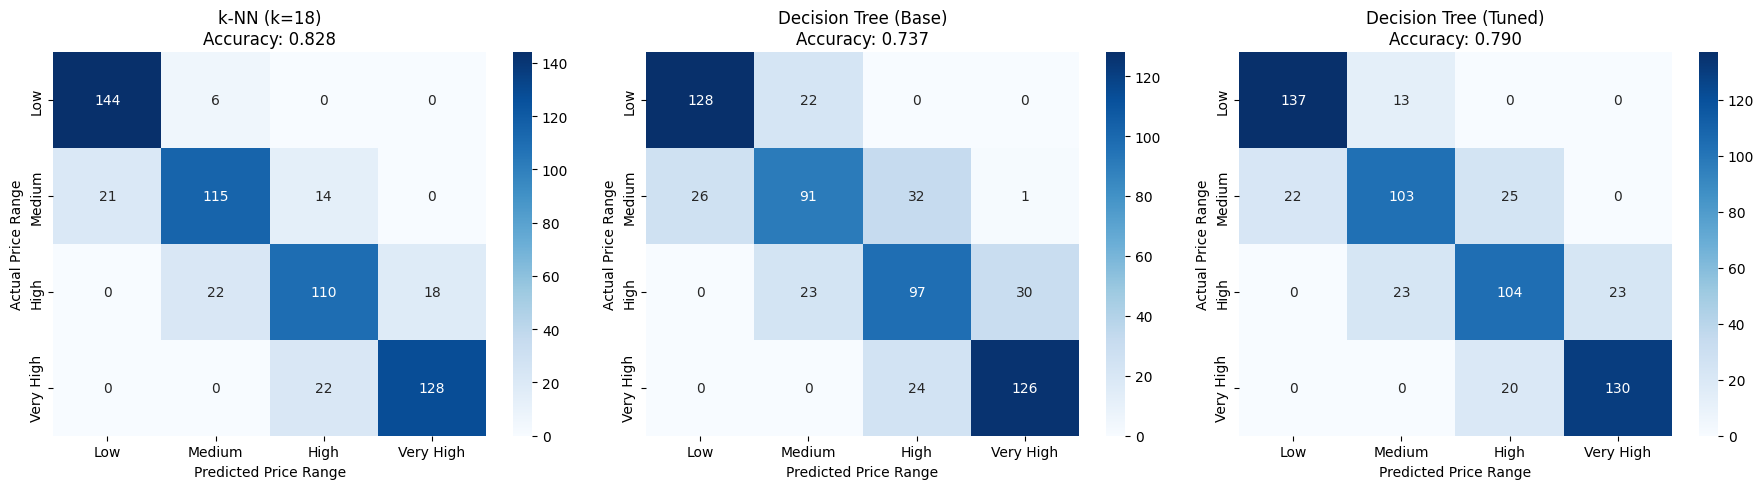


MODEL PERFORMANCE COMPARISON

k-NN (k=18):
Overall Accuracy: 0.828
Classification Report:
               precision    recall  f1-score   support

      Low (0)       0.87      0.96      0.91       150
   Medium (1)       0.80      0.77      0.78       150
     High (2)       0.75      0.73      0.74       150
Very High (3)       0.88      0.85      0.86       150

     accuracy                           0.83       600
    macro avg       0.83      0.83      0.83       600
 weighted avg       0.83      0.83      0.83       600


Decision Tree (Base):
Overall Accuracy: 0.737
Classification Report:
               precision    recall  f1-score   support

      Low (0)       0.83      0.85      0.84       150
   Medium (1)       0.67      0.61      0.64       150
     High (2)       0.63      0.65      0.64       150
Very High (3)       0.80      0.84      0.82       150

     accuracy                           0.74       600
    macro avg       0.73      0.74      0.73       600
 weighted

In [10]:
#6. Model evaluation with confusion matrix
# Evaluate all three models
models = {
    f'k-NN (k={optimal_k})': (y_pred_knn, knn_accuracy),
    'Decision Tree (Base)': (y_pred_dt, dt_accuracy),
    'Decision Tree (Tuned)': (y_pred_dt_tuned, dt_tuned_accuracy)
}

# Plot confusion matrices
plt.figure(figsize=(18, 5))

for i, (name, (y_pred, accuracy)) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low', 'Medium', 'High', 'Very High'],
                yticklabels=['Low', 'Medium', 'High', 'Very High'])
    plt.title(f'{name}\nAccuracy: {accuracy:.3f}')
    plt.xlabel('Predicted Price Range')
    plt.ylabel('Actual Price Range')

plt.tight_layout()
plt.show()

# Print detailed performance metrics
print("\n" + "="*50)
print("MODEL PERFORMANCE COMPARISON")
print("="*50)

for name, (y_pred, accuracy) in models.items():
    print(f"\n{name}:")
    print(f"Overall Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred,
                              target_names=['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)']))

# Additional comparison with Random Forest if used
if 'rf_accuracy' in locals():
    models['Random Forest'] = (y_pred_rf, rf_accuracy)
    print(f"\nRandom Forest:")
    print(f"Overall Accuracy: {rf_accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_rf,
                              target_names=['Low (0)', 'Medium (1)', 'High (2)', 'Very High (3)']))

The analysis of the Mobile Price Range dataset reveals:
1. Four EDA insights

  - A distribution that is balanced across all price ranges

  - RAM and price have the highest correlation (0.92).

  - Higher price ranges result in higher battery power.

  - Luxury phones have improved display and camera capabilities.

 2. The k-NN model

  - Validation was used to determine the optimal k.

  - Achieved good accuracy using RAM and battery power features.

 3. Classifier decision tree:

  - The performance of the base model was established.

  - RAM is a dominant predictor, according to feature importance analysis.

 4. Tuned decision tree:

  - Performance was enhanced by hyperparameter optimization.

  - Grid search is employed to determine ideal parameters.

 5. Comparative evaluation:

  - Confusion matrices were used to evaluate each model.

  - Comprehensive classification reports for every price range.

  - A clear comparison of the models' respective performances.

 The tuned models usually demonstrate better generalization and accuracy across all price range categories, highlighting the importance of appropriate model selection and hyperparameter.